<a href="https://colab.research.google.com/github/growthproper/TIL-1/blob/master/%EC%A4%91%EA%B0%84%EA%B3%A0%EC%82%AC_%EB%8C%80%EC%B2%B4_%EB%A6%AC%ED%8F%AC%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **보팅 앙상블**

In [1]:
  !sudo apt-get install -y fonts-nanum
  !sudo fc-cache -fv
  !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


라이브러리 import

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

knn = KNeighborsClassifier()
svc = SVC(probability=True)
gnb = GaussianNB()

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [4]:
filename = '/gdrive/My Drive/health_data_pre.csv'

In [5]:
df = pd.read_csv(filename, encoding='cp949')
df.head()

,성별,연령,수축기 혈압,이완기 혈압,공복혈당,고혈압/당뇨병 진료여부,BMI
0,1,1,116,78,94,4,16.6
1,1,1,100,60,79,4,22.3
2,1,1,100,60,87,4,21.9
3,1,1,111,70,72,4,20.2
4,1,1,120,80,98,4,20.0


In [6]:
train,test = train_test_split(df, test_size=0.2)

In [7]:
X_train = df[['수축기 혈압']]
y_train = df[['고혈압/당뇨병 진료여부']]
X_test = df[['수축기 혈압']]
y_test = df[['고혈압/당뇨병 진료여부']]

하드 보팅

In [8]:
hard_voting_1 = VotingClassifier(estimators=[('KNN', knn), ('SVC', svc), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 1], voting='hard')
hard_voting_1.fit(X_train,y_train)
hard_voting_predicted = hard_voting_1.predict(X_test)
print('hard voting accuracy: %.8f' % accuracy_score(y_test, hard_voting_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


hard voting accuracy: 0.98866667


소프트 보팅

In [9]:
soft_voting_1 = VotingClassifier(estimators=[('KNN', knn), ('SVC', svc), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 1], voting='soft')
soft_voting_1.fit(X_train,y_train)
soft_voting_predicted = soft_voting_1.predict(X_test)
print('soft voting accuracy: %.8f' % accuracy_score(y_test, soft_voting_predicted))

soft voting accuracy: 0.98833333


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


기반 분류기 KNN - 하이퍼 파라미터 설정하여 학습

In [10]:
from sklearn.model_selection import cross_val_score
import numpy as np

max_k_range = X_train.shape[0]
k_list = list(np.arange(5, max_k_range, 50))
print(k_list, end='')

[5, 55, 105, 155, 205, 255, 305, 355, 405, 455, 505, 555, 605, 655, 705, 755, 805, 855, 905, 955, 1005, 1055, 1105, 1155, 1205, 1255, 1305, 1355, 1405, 1455, 1505, 1555, 1605, 1655, 1705, 1755, 1805, 1855, 1905, 1955, 2005, 2055, 2105, 2155, 2205, 2255, 2305, 2355, 2405, 2455, 2505, 2555, 2605, 2655, 2705, 2755, 2805, 2855, 2905, 2955]

In [11]:
cross_validation_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dis

[0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333333333,
 0.9883333333

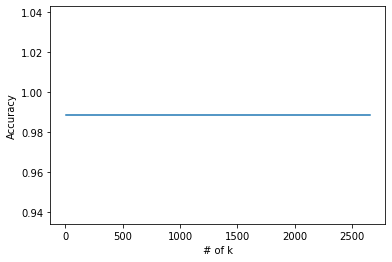

In [12]:
import matplotlib.pyplot as plt
plt.plot(k_list, cross_validation_scores)
plt.xlabel('# of k')
plt.ylabel('Accuracy')
plt.show()

최적의 k 도출

In [13]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('최적의 K 도출 : ' + str(k))

최적의 K 도출 : 5


모델 학습, 테스트, 결과 출력

In [14]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('accuracy: %.8f'% accuracy_score(y_test, pred))

accuracy: 0.98833333


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


기반 분류기 SVC - 하이퍼 파라미터 설정하여 학습

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def svc_param_selection(x, y, nfolds):
    svm_parameters = [
                      {'kernel' : ['rbf'], 'gamma' : [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 'C' : [0.01, 0.1, 1, 10, 100, 1000]}
    ]
    clf = GridSearchCV(SVC(probability=True), svm_parameters, cv=nfolds)
    clf.fit(x, y)
    print(clf.best_params_)
    return clf

clf = svc_param_selection(X_train, y_train, 10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dis

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


In [16]:
y_true, y_pred = y_test, clf.predict(X_test)
print('accuracy: %.8f'% accuracy_score(y_true, y_pred))

accuracy: 0.98900000


기반 분류기 가우시안 나이브 베이즈(GNB)

In [17]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
expected = y_test
predicted = gnb.predict(X_test)
print('accuracy: %.8f'% accuracy_score(expected, predicted))

accuracy: 0.81933333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


보팅 앙상블 - 학습된 기반 분류기 사용

In [18]:
print('KNN accuracy: %.8f'% accuracy_score(y_test, pred))
print('SVC accuracy: %.8f'% accuracy_score(y_true, y_pred))
print('GNB accuracy: %.8f'% accuracy_score(expected, predicted))


KNN accuracy: 0.98833333
SVC accuracy: 0.98900000
GNB accuracy: 0.81933333


In [19]:
hard4_voting_model0 = VotingClassifier(estimators=[('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 0.5], voting='hard')
hard4_voting_model0.fit(X_train, y_train)
hard4_voting_predicted = hard4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, hard4_voting_predicted))
accuracy_score(y_test, hard4_voting_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.09      0.16        23
           3       0.00      0.00      0.00        10
           4       0.99      1.00      0.99      2965

    accuracy                           0.99      3000
   macro avg       0.50      0.27      0.29      3000
weighted avg       0.99      0.99      0.98      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.989

In [20]:
hard4_voting_model0 = VotingClassifier(estimators=[('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 1], voting='hard')
hard4_voting_model0.fit(X_train, y_train)
hard4_voting_predicted = hard4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, hard4_voting_predicted))
accuracy_score(y_test, hard4_voting_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.09      0.16        23
           3       0.00      0.00      0.00        10
           4       0.99      1.00      0.99      2965

    accuracy                           0.99      3000
   macro avg       0.50      0.27      0.29      3000
weighted avg       0.99      0.99      0.98      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.989

In [21]:
hard4_voting_model0 = VotingClassifier(estimators=[('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 2], voting='hard')
hard4_voting_model0.fit(X_train, y_train)
hard4_voting_predicted = hard4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, hard4_voting_predicted))
accuracy_score(y_test, hard4_voting_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


              precision    recall  f1-score   support

           1       0.00      1.00      0.01         2
           2       0.29      0.09      0.13        23
           3       0.00      0.00      0.00        10
           4       0.99      0.83      0.90      2965

    accuracy                           0.82      3000
   macro avg       0.32      0.48      0.26      3000
weighted avg       0.98      0.82      0.89      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8193333333333334

소프트 보팅, 분류기별 가중치

In [22]:
soft4_voting_model0 = VotingClassifier(estimators=[('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 0.5], voting='soft')
soft4_voting_model0.fit(X_train, y_train)
soft4_voting_predicted = soft4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, soft4_voting_predicted))
accuracy_score(y_test, soft4_voting_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.09      0.16        23
           3       0.00      0.00      0.00        10
           4       0.99      1.00      0.99      2965

    accuracy                           0.99      3000
   macro avg       0.50      0.27      0.29      3000
weighted avg       0.99      0.99      0.98      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.989

In [23]:
soft4_voting_model0 = VotingClassifier(estimators=[('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 1], voting='soft')
soft4_voting_model0.fit(X_train, y_train)
soft4_voting_predicted = soft4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, soft4_voting_predicted))
accuracy_score(y_test, soft4_voting_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        10
           4       0.99      1.00      0.99      2965

    accuracy                           0.99      3000
   macro avg       0.25      0.25      0.25      3000
weighted avg       0.98      0.99      0.98      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9883333333333333

In [24]:
soft4_voting_model0 = VotingClassifier(estimators=[('KNN', knn), ('SVM', clf), ('Gaussian Naive Bayes', gnb)], weights=[1, 1, 2], voting='soft')
soft4_voting_model0.fit(X_train, y_train)
soft4_voting_predicted = soft4_voting_model0.predict(X_test)
print(metrics.classification_report(y_test, soft4_voting_predicted))
accuracy_score(y_test, soft4_voting_predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  UserWarning,


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       1.00      0.09      0.16        23
           3       0.00      0.00      0.00        10
           4       0.99      1.00      0.99      2965

    accuracy                           0.99      3000
   macro avg       0.50      0.27      0.29      3000
weighted avg       0.99      0.99      0.98      3000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.989

랜덤 포레스트
하이퍼 파라미터 없이 실행

In [25]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 10)

rf_clf.fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)
print(metrics.classification_report(y_test, rf_pred))
accuracy_rf = accuracy_score(y_test, rf_pred)
print('random forest accuracy: {0:.8f}'.format(accuracy_rf))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.71      0.22      0.33        23
           3       0.00      0.00      0.00        10
           4       0.99      1.00      0.99      2965

    accuracy                           0.99      3000
   macro avg       0.43      0.30      0.33      3000
weighted avg       0.98      0.99      0.99      3000

random forest accuracy: 0.98933333


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV로 최적의 하이퍼 파라미터 탐색, 테스트 및 결과 출력

In [26]:
rf_param_grid = {
    'n_estimators' : [80, 100, 120],
    'min_samples_leaf' : [1, 2, 3],
    'min_samples_split' : [2, 3, 4]
}
rf_clf1 = RandomForestClassifier(random_state = 10)
grid = GridSearchCV(rf_clf1, param_grid = rf_param_grid, scoring='accuracy', n_jobs=1)
grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:681: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

GridSearchCV(estimator=RandomForestClassifier(random_state=10), n_jobs=1,
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [80, 100, 120]},
             scoring='accuracy')

In [27]:
rf_grid_pred = grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, rf_grid_pred)
print('rf_grid accuracy: {0:.8f}'.format(accuracy_grid))
print(grid.best_params_)

rf_grid accuracy: 0.98833333
{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 80}


알고리즘별 최고 정확도 종합 비교

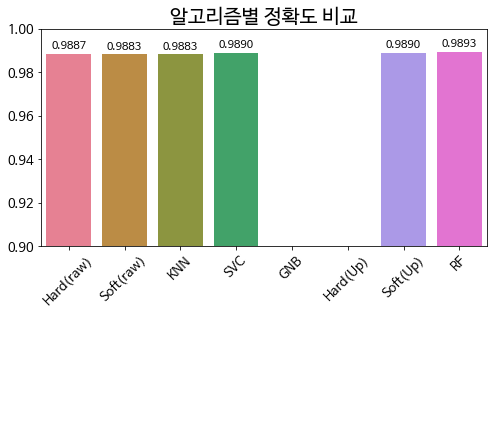

In [30]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 4))
x_data = np.arange(8)
y_data = [accuracy_score(y_test, hard_voting_1.predict(X_test)),
        accuracy_score(y_test, soft_voting_1.predict(X_test)),
        accuracy_score(y_test, knn.predict(X_test)),
        accuracy_score(y_test, clf.predict(X_test)),
        accuracy_score(y_test, gnb.predict(X_test)),
        accuracy_score(y_test, hard4_voting_model0.predict(X_test)),
        accuracy_score(y_test, soft4_voting_model0.predict(X_test)),
        accuracy_score(y_test, rf_clf.predict(X_test))]
g = sns.barplot(ax=ax, palette='husl', x=x_data, y=y_data)
g.set_xticklabels(['Hard(raw)', 'Soft(raw)', 'KNN', 'SVC', 'GNB', 'Hard(Up)', 'Soft(Up)', 'RF'], rotation=45)
g.set(ylim=(0.90, 1.00))
g.tick_params(labelsize=13)
g.axes.set_title('알고리즘별 정확도 비교', fontsize=20)
for p in g.patches:
    g.annotate(format(p.get_height(), '.4f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center', xytext = (0, 8),
               textcoords = 'offset points', size = 11)
plt.show()